https://analyticsindiamag.com/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
dataset = pd.read_csv('V3Economic19.12.2020.csv')
#X = dataset.iloc[:, [3, 4]].values

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   States                  37 non-null     object 
 1   Geopolitical zones      37 non-null     object 
 2   Latitude                37 non-null     float64
 3   Longitude               37 non-null     float64
 4   Population_Female       37 non-null     int64  
 5   Population_Male         37 non-null     int64  
 6   Population_Total        37 non-null     int64  
 7   Confirmed               37 non-null     int64  
 8   Admission               37 non-null     int64  
 9   Discharged              37 non-null     int64  
 10  Deaths                  37 non-null     int64  
 11  Discharge rate          37 non-null     float64
 12  Fatality rate           37 non-null     float64
 13  Percentage Reduction    37 non-null     float64
 14  Primary health care     37 non-null     int6

In [101]:
dataset.head()

,States,Geopolitical zones,Latitude,Longitude,Population_Female,Population_Male,Population_Total,Confirmed,Admission,Discharged,Deaths,Discharge rate,Fatality rate,Percentage Reduction,Primary health care,Secondary health care,Tertiary,Health care total,COVID-19_lab
0,Abia,South East,5.532003,7.486002,2117742,1965828,4083570,980,25,945,10,96.43,1.02,24.82,936,138,6,1080,2
1,Adamawa,North East,10.270341,13.270032,1834828,1771877,3606705,355,96,238,21,67.04,5.92,24.00,1672,20,4,1696,1
2,Akwa Ibom,South South,5.007996,7.849999,1801535,1684078,3485613,395,50,336,9,85.06,2.28,38.77,547,10,3,560,1
3,Anambra,South East,6.210434,7.069997,2192738,2036023,4228761,299,6,274,19,91.64,6.35,17.72,979,151,17,1147,2
4,Bauchi,North East,11.680410,10.190013,3140988,3038042,6179030,897,108,775,14,86.40,1.56,23.44,1246,23,3,1272,2


In [102]:
dataset.shape

(37, 19)

from sklearn.preprocessing import LabelEncoder, StandardScaler

State_list = dataset.iloc[:, 0]
encoder = LabelEncoder()
y = encoder.fit_transform(State_list)
#X = encoder.fit_transform(State_list)
print(y)

In [103]:
corr = dataset.corr()
corr.head()

,Latitude,Longitude,Population_Female,Population_Male,Population_Total,Confirmed,Admission,Discharged,Deaths,Discharge rate,Fatality rate,Percentage Reduction,Primary health care,Secondary health care,Tertiary,Health care total,COVID-19_lab
Latitude,1.000000,0.294683,0.271392,0.291166,0.281023,-0.131335,-0.003380,-0.145523,-0.175522,-0.341218,0.000374,-0.393429,0.303834,-0.384740,0.328277,0.250123,-0.069190
Longitude,0.294683,1.000000,-0.137357,-0.137242,-0.137346,-0.295169,-0.150484,-0.306949,-0.297435,-0.351828,0.035168,-0.100628,0.073814,-0.365762,0.033536,0.021870,-0.225448
Population_Female,0.271392,-0.137357,1.000000,0.998713,0.999700,0.357793,0.225514,0.365563,0.373734,0.101077,-0.224225,0.011772,0.465393,0.276034,0.681011,0.507849,0.509707
Population_Male,0.291166,-0.137242,0.998713,1.000000,0.999655,0.375190,0.243410,0.382371,0.386492,0.080484,-0.226669,0.006660,0.474242,0.274273,0.673122,0.515804,0.517913
Population_Total,0.281023,-0.137346,0.999700,0.999655,1.000000,0.366305,0.234223,0.373793,0.380011,0.091170,-0.225476,0.009308,0.469814,0.275273,0.677422,0.511852,0.513832


In [87]:
corr.to_csv('Correlation Coefficient.csv', index=False)

<AxesSubplot:>

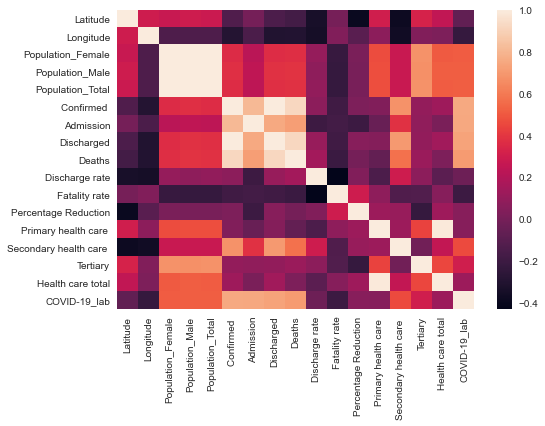

In [104]:
import seaborn as sns
sns.heatmap(corr)

In [105]:
dataset.describe()

,Latitude,Longitude,Population_Female,Population_Male,Population_Total,Confirmed,Admission,Discharged,Deaths,Discharge rate,Fatality rate,Percentage Reduction,Primary health care,Secondary health care,Tertiary,Health care total,COVID-19_lab
count,37.000000,37.000000,3.700000e+01,3.700000e+01,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,8.488984,7.292317,2.498614e+06,2.376014e+06,4.874628e+06,2106.297297,241.378378,1832.000000,32.918919,85.395405,4.126216,28.996216,983.216216,45.027027,10.945946,1039.189189,1.837838
std,2.544753,2.466649,1.296103e+06,1.208364e+06,2.503662e+06,4498.714241,590.642463,3996.068095,41.726875,10.426030,6.478127,14.023121,436.790385,62.374535,16.247984,455.965693,1.236337
min,4.771900,3.350017,5.608650e+05,5.390870e+05,1.099952e+06,5.000000,0.000000,3.000000,2.000000,54.170000,0.800000,0.010000,264.000000,2.000000,0.000000,269.000000,0.000000
25%,6.340477,5.469940,1.764113e+06,1.684078e+06,3.457181e+06,381.000000,25.000000,300.000000,11.000000,82.380000,1.560000,20.370000,722.000000,8.000000,3.000000,743.000000,1.000000
50%,7.870410,7.320008,2.106699e+06,1.986939e+06,4.083570e+06,897.000000,53.000000,775.000000,21.000000,89.070000,2.390000,26.830000,930.000000,22.000000,6.000000,997.000000,1.000000
75%,10.620423,8.520038,2.883631e+06,2.792478e+06,5.625974e+06,1843.000000,183.000000,1737.000000,36.000000,92.410000,4.270000,36.770000,1213.000000,52.000000,12.000000,1262.000000,2.000000
max,13.060015,13.270032,7.119627e+06,6.604619e+06,1.372425e+07,26490.000000,2938.000000,24002.000000,236.000000,96.430000,40.000000,86.630000,2073.000000,318.000000,79.000000,2110.000000,6.000000


In [106]:
dataset.isnull().sum()

States                    0
Geopolitical zones        0
Latitude                  0
Longitude                 0
Population_Female         0
Population_Male           0
Population_Total          0
Confirmed                 0
Admission                 0
Discharged                0
Deaths                    0
Discharge rate            0
Fatality rate             0
Percentage Reduction      0
Primary health care       0
Secondary health care     0
Tertiary                  0
Health care total         0
COVID-19_lab              0
dtype: int64

In [107]:
X = dataset.iloc[:, [6,7,8,9,10,11,12,14,15,16,17,18]]
y = dataset.iloc[:, 7]

Text(0.5, 1.0, 'Clusters before K-means')

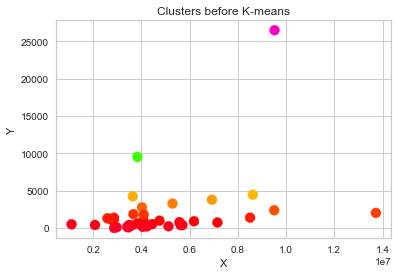

In [108]:
#Visualize data before K-means is applied
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, s=100, cmap='gist_rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters before K-means')

In [109]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

State_list = dataset.iloc[:, 0]
encoder = LabelEncoder()
y = encoder.fit_transform(State_list)
#X = encoder.fit_transform(State_list)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 14]


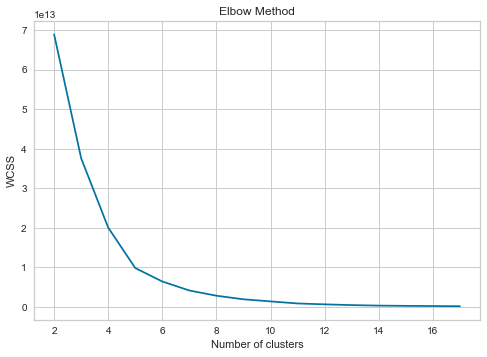

In [111]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [112]:
#import Yellowbrick
from yellowbrick.cluster import KElbowVisualizer

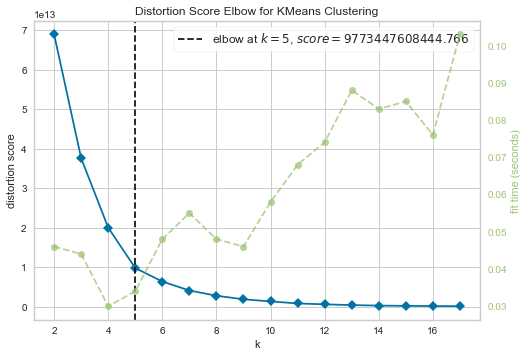

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [114]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,18))

visualizer.fit(X)       
visualizer.show()

from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X)       
visualizer.show()

In [115]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

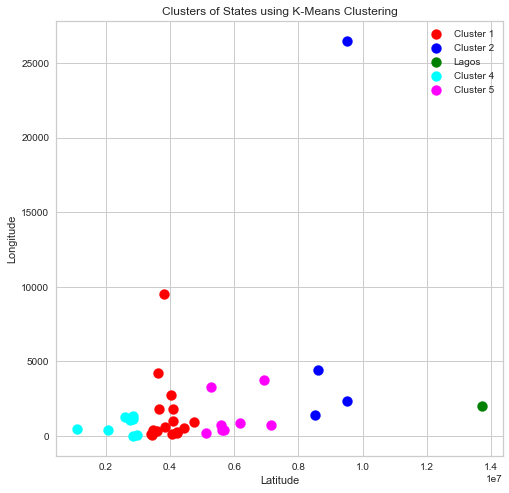

In [116]:
#You have to convert to np array for the plot to work
import numpy as np
X_1=np.array(X)

plt.figure(figsize=(8,8))
plt.scatter(X_1[y_kmeans == 0, 0], X_1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[y_kmeans == 1, 0], X_1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[y_kmeans == 2, 0], X_1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Lagos')
plt.scatter(X_1[y_kmeans == 3, 0], X_1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_1[y_kmeans == 4, 0], X_1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of States using K-Means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

In [117]:
centers = kmeans.cluster_centers_
centers

array([[3.92686250e+06, 1.55225000e+03, 2.45437500e+02, 1.27806250e+03,
        2.87500000e+01, 8.50556250e+01, 3.34625000e+00, 9.16625000e+02,
        3.79375000e+01, 5.75000000e+00, 9.60312500e+02, 1.81250000e+00],
       [9.03774325e+06, 8.67450000e+03, 8.35000000e+02, 7.75425000e+03,
        8.52500000e+01, 8.63650000e+01, 1.27250000e+00, 1.49950000e+03,
        1.01000000e+02, 3.45000000e+01, 1.63500000e+03, 3.25000000e+00],
       [1.37242460e+07, 2.01600000e+03, 2.04000000e+02, 1.75600000e+03,
        5.60000000e+01, 8.71000000e+01, 2.78000000e+00, 1.39500000e+03,
        2.20000000e+01, 6.40000000e+01, 1.48100000e+03, 4.00000000e+00],
       [2.51107113e+06, 7.40000000e+02, 6.07500000e+01, 6.60125000e+02,
        1.91250000e+01, 8.53187500e+01, 8.36500000e+00, 8.08500000e+02,
        3.95000000e+01, 6.12500000e+00, 8.54125000e+02, 1.12500000e+00],
       [5.94595650e+06, 1.30787500e+03, 1.21750000e+02, 1.16012500e+03,
        2.60000000e+01, 8.54537500e+01, 3.04250000e+00, 9.81

In [118]:
kmeans.labels_

array([0, 0, 0, 0, 4, 3, 0, 4, 3, 0, 3, 0, 3, 3, 3, 4, 4, 1, 2, 1, 0, 3,
       3, 1, 0, 4, 1, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0])

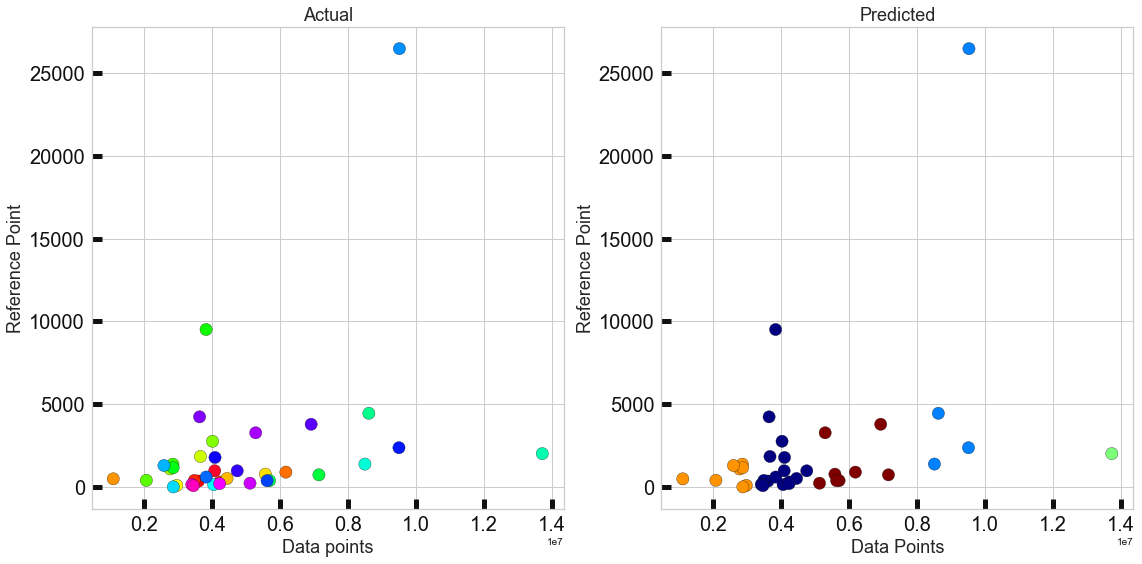

In [119]:
#Visualizing Clusters after k-means
new_labels = kmeans.labels_
#Visualize data with reference to before and after k-means clustering
#Actual vs predicted plot
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Data points', fontsize=18)
axes[0].set_ylabel('Reference Point', fontsize=18)
axes[1].set_xlabel('Data Points', fontsize=18)
axes[1].set_ylabel('Reference Point', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.tight_layout()

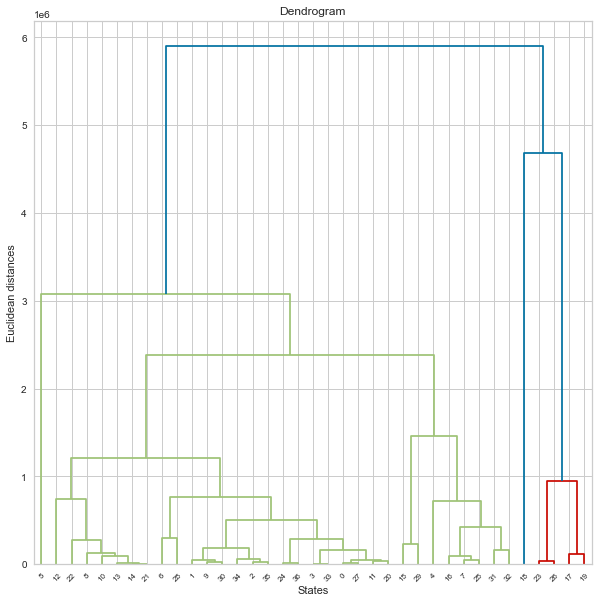

In [120]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
#dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Euclidean distances')
plt.show()

In [121]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [124]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X_1[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_1[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_1[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of States using Hierarchical Clustering')
plt.xlabel('States')
plt.ylabel('Confirmed')
plt.legend()
plt.show()

TypeError: '(array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False]), 1)' is an invalid key

<Figure size 576x576 with 0 Axes>